C:\Users\Dharani Ravi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


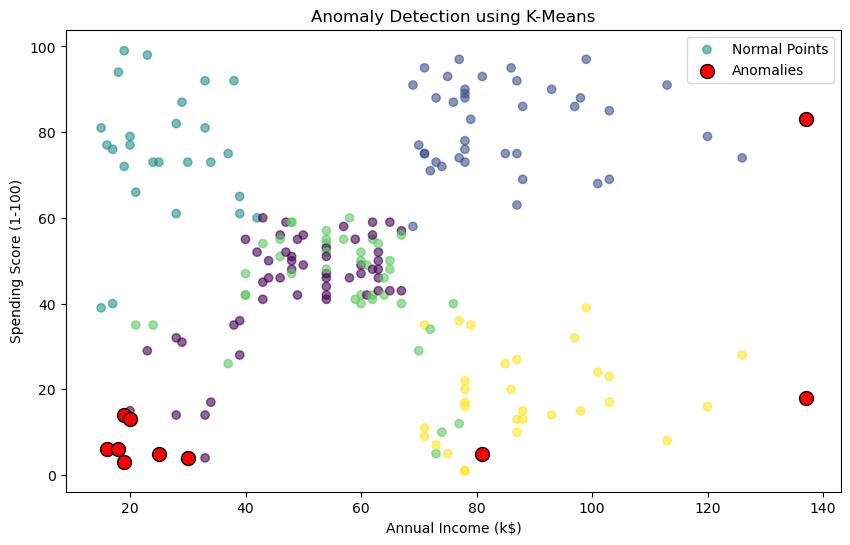

Detected Anomalies:
     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
2             3  Female   20                  16                       6   
6             7  Female   35                  18                       6   
8             9    Male   64                  19                       3   
10           11    Male   67                  19                      14   
14           15    Male   37                  20                      13   
22           23  Female   46                  25                       5   
30           31    Male   60                  30                       4   
162         163    Male   19                  81                       5   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Cluster  Anomaly Score  Anomaly  
2          3       2.051516     True  
6          3       2.027250     True  
8          0       1.96046

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

file_path = "C:\\Users\\Dharani Ravi\\Downloads\\kmeans\\Mall_Customers.csv"
df = pd.read_csv(file_path)

X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

distances = np.min(kmeans.transform(X_scaled), axis=1)
df['Anomaly Score'] = distances

threshold = np.percentile(distances, 95)

df['Anomaly'] = df['Anomaly Score'] > threshold

plt.figure(figsize=(10, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', alpha=0.6, label='Normal Points')
plt.scatter(X[df['Anomaly']]['Annual Income (k$)'], X[df['Anomaly']]['Spending Score (1-100)'], c='red', edgecolors='k', label='Anomalies', s=100)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Anomaly Detection using K-Means")
plt.legend()
plt.show()

print("Detected Anomalies:")
print(df[df['Anomaly']])
